# Segmentacion semantica con Tensorflow Hub

In [10]:
! pip install tensorflow==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 665.5 MB 22 kB/s 
     |████████████████████████████████| 1.3 MB 33.3 MB/s 
     |████████████████████████████████| 463 kB 69.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.1
    Uninstalling tensorflow-2.9.1:
      Successfully uninstalled tensorflow-2.9.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.9.2 req

In [1]:
! git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3422, done.
remote: Counting objects: 100% (3422/3422), done.
remote: Compressing objects: 100% (2853/2853), done.
remote: Total 3422 (delta 894), reused 1428 (delta 512), pack-reused 0
Receiving objects: 100% (3422/3422), 35.13 MiB | 17.65 MiB/s, done.
Resolving deltas: 100% (894/894), done.


In [2]:
%cd models/research
! protoc object_detection/protos/*.proto --python_out=.
! cp object_detection/packages/tf2/setup.py .
! python -m pip install -q .

/content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 10.9 MB 5.2 MB/s 
     |████████████████████████████████| 352 kB 56.7 MB/s 
     |████████████████████████████████| 2.1 MB 10.3 MB/s 
     |████████████████████████████████| 25.9 MB 1.4 MB/s 
     |████████████████████████████████| 67 kB 6.2 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 237 kB 67.0 MB/s 
     |████████████████████████████████| 92 kB 12.1 MB/s 
     |████████████████████████████████| 636 kB 63.1 MB/s 
     |████████████████████████████████| 48.3 MB 1.8 MB/s 
    

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import tensorflow as tf
from PIL import Image

In [2]:
from object_detection.utils import ops
from object_detection.utils import visualization_utils as viz
from object_detection.utils.label_map_util import create_category_index_from_labelmap

In [3]:
model_path = 'https://tfhub.dev/tensorflow/mask_rcnn/inception_resnet_v2_1024x1024/1'
model = hub.load(model_path)

In [6]:
model2_path = 'https://tfhub.dev/tensorflow/lite-model/deeplabv3/1/default/1'
model2 = hub.load(model2_path)

HTTPError: ignored

In [4]:
label_path = '/content/models/research/object_detection/data/mscoco_label_map.pbtxt'
cat_idx = create_category_index_from_labelmap(label_path)

In [8]:
%matplotlib inline

In [12]:
def predict(img_path, model):
  img = Image.open(img_path)
  img = np.array(img)[np.newaxis,:]
  results = model(img)
  results = {k: v.numpy() for k,v in results.items()}
  masks = results['detection_masks'][0]
  boxes = results['detection_boxes'][0]
  scores = results['detection_scores'][0]
  classes = results['detection_classes'][0].astype('int')

  masks = ops.reframe_box_masks_to_image_masks(masks, boxes, img.shape[1], img.shape[2])
  masks = tf.cast(masks>0.5, tf.uint8).numpy()

  img2 = img[0].copy()
  viz.visualize_boxes_and_labels_on_image_array(
      img2,
      boxes,
      classes,
      scores,
      cat_idx,
      instance_masks = masks,
      use_normalized_coordinates=True
  )
  plt.figure(figsize=(12,12))
  plt.imshow(img2)
  plt.show()

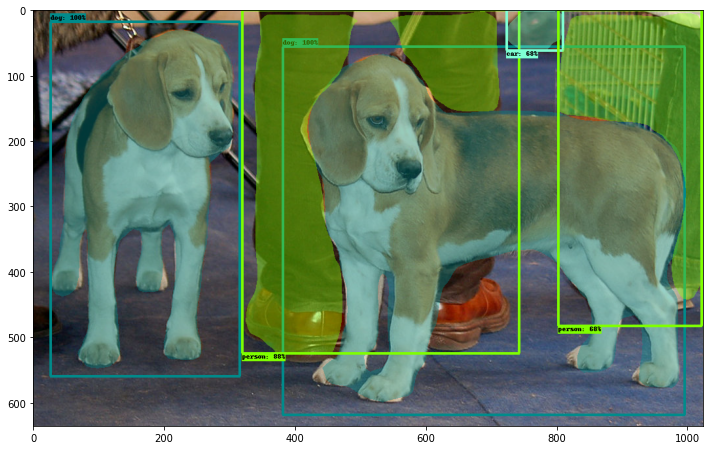

In [13]:
predict('/content/models/research/object_detection/test_images/image1.jpg', model)

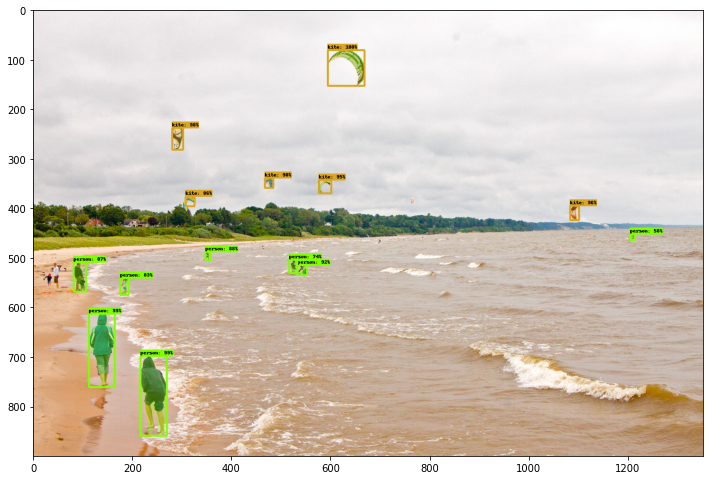

In [14]:
predict('/content/models/research/object_detection/test_images/image2.jpg', model)